# <font color='blue'>Marketing Analytics</font>
## <font color='blue'>Análise de Indicadores de Performance em Redes de Varejo</font>

### <font color='blue'>Objetivo: Calcular 7 indicadores de performance, sendo eles:</font>
<p></p>
<li><font color='blue'>Indicador 1 – Faturamento Mensal</font></li>
<li><font color='blue'>Indicador 2 - Taxa Percentual de Crescimento Mensal</font></li>
<li><font color='blue'>Indicador 3 - Clientes Ativos Por Mês em um País (Brasil)</font></li>
<li><font color='blue'>Indicador 4 - Total de Itens Comprados Por Mês em um País (Brasil)</font></li>
<li><font color='blue'>Indicador 5 - Faturamento Médio Mensal em um País (Brasil)</font></li>
<li><font color='blue'>Indicador 6 - Diferença de Faturamento ao Longo do Tempo Entre Clientes Novos e Antigos</font></li>
<li><font color='blue'>Indicador 7 - Taxa de Novos Clientes</font></li>

In [1]:
# Carregando as bibliotecas
import numpy as np
import pandas as pd
import datetime

In [2]:
# Carregando o arquivo com os dados
dados = pd.read_csv("dados/dataset.csv", header = 0, encoding = 'unicode_escape')

In [3]:
# Visualizando os dados
dados.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil


In [4]:
# Visualizando o tipo das colunas
dados.dtypes

NumeroFatura      object
CodigoProduto     object
NomeProduto       object
Quantidade         int64
DataVenda         object
ValorUnitario    float64
IdCliente        float64
Pais              object
dtype: object

In [5]:
# Passando a coluna "DataVenda" para o tipo data
dados.DataVenda = pd.to_datetime(dados["DataVenda"])

In [6]:
dados.dtypes

NumeroFatura             object
CodigoProduto            object
NomeProduto              object
Quantidade                int64
DataVenda        datetime64[ns]
ValorUnitario           float64
IdCliente               float64
Pais                     object
dtype: object

#### Calculando o primeiro indicador: Faturamento mensal

In [7]:
# Primeiro será verificado o range de datas
print(dados.DataVenda.min())
print(dados.DataVenda.max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [8]:
# Como existem datas dos anos de 2010 e 2011, será criada uma nova coluna de Mês/Ano
dados["Ano/Mês"] = dados["DataVenda"].dt.strftime('%Y%m')

In [9]:
dados.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Ano/Mês
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Brasil,201012
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Brasil,201012
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Brasil,201012
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012


In [10]:
# Para calcula o faturamento, será multiplicado a quantidade pelo valor unitário
dados["Faturamento"] = dados["Quantidade"]*dados["ValorUnitario"]

In [11]:
dados.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Ano/Mês,Faturamento
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Brasil,201012,25.50
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Brasil,201012,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Brasil,201012,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34


In [12]:
# Calculando o faturamento por mês
faturamento_mes = dados.groupby(["Ano/Mês"])["Faturamento"].sum(); faturamento_mes

Ano/Mês
201012     748957.020
201101     560000.260
201102     498062.650
201103     683267.080
201104     493207.121
201105     723333.510
201106     691123.120
201107     681300.111
201108     682680.510
201109    1019687.622
201110    1070704.670
201111    1461756.250
201112     431245.000
Name: Faturamento, dtype: float64

In [13]:
# Plot
faturamento_mes.plot(kind = "bar")

#### Calculando o segundo indicador: Taxa percentual de Crescimento Mensal

In [14]:
# Transformando uma Série em um DataFrame
faturamento_mes2 = pd.DataFrame(faturamento_mes).reset_index()
faturamento_mes2

,Ano/Mês,Faturamento
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [15]:
# Incluindo uma coluna com a taxa de crescimento mensal
faturamento_mes2["Crescimento_mes"] = faturamento_mes2["Faturamento"].pct_change()
faturamento_mes2.head()

,Ano/Mês,Faturamento,Crescimento_mes
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


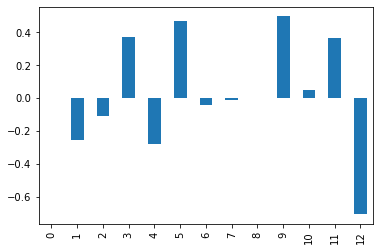

In [16]:
# Plot
faturamento_mes2["Crescimento_mes"].plot(kind = "bar")

#### Calculando o terceiro indicador: Clientes ativos por mês em um país (Brasil)

Clientes ativos = fizeram pelo menos uma compra por mês

In [17]:
dados_Brasil = dados[dados["Pais"]=="Brasil"]; dados_Brasil.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Ano/Mês,Faturamento
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Brasil,201012,25.50
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Brasil,201012,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Brasil,201012,22.00
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34


In [18]:
clientes_ativos = dados_Brasil.groupby("Ano/Mês")["IdCliente"].nunique().reset_index(); clientes_ativos

,Ano/Mês,IdCliente
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


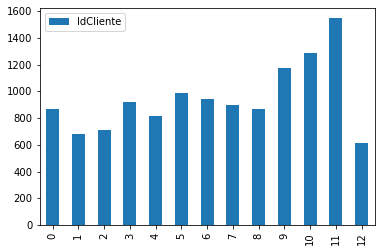

In [19]:
# Plot
clientes_ativos.plot(kind = "bar")

#### Calculando o quarto indicador: Total de itens comprados por mês em um país (Brasil)

In [20]:
itens_comprados = dados_Brasil.groupby("Ano/Mês")["Quantidade"].sum().reset_index(); itens_comprados

,Ano/Mês,Quantidade
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


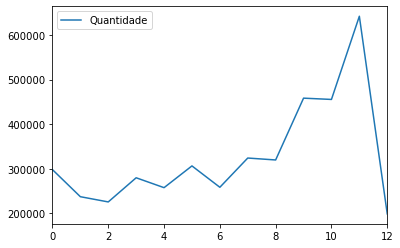

In [21]:
# Plot
itens_comprados.plot()

#### Calculando o quinto indicador: Faturamento médio mensal em um país (Brasil)

In [22]:
faturamento_Brasil = dados_Brasil.groupby("Ano/Mês")["Faturamento"].mean().reset_index(); faturamento_Brasil

,Ano/Mês,Faturamento
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


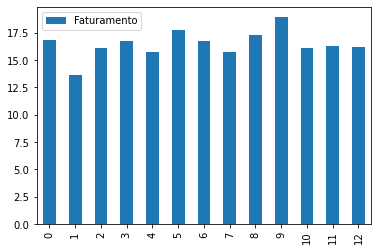

In [23]:
faturamento_Brasil.plot(kind = "bar")

#### Calculando o sexto indicador: Diferença de faturamento ao longo do tempo entre clientes novos e antigos

Cliente novo = realizou somente uma compra;
Cliente antigo = realizou mais de uma compra.

In [24]:
# Verificando a data da primeira compra de cada cliente
compra_minima = dados.groupby("IdCliente")["DataVenda"].min().reset_index(); compra_minima.head()

,IdCliente,DataVenda
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [25]:
# Ajustando o nome das colunas
compra_minima.columns = ["IdCliente", "Data_MenorCompra"]; compra_minima.head()

,IdCliente,Data_MenorCompra
0,12346.0,2011-01-18 10:01:00
1,12347.0,2010-12-07 14:57:00
2,12348.0,2010-12-16 19:09:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00


In [26]:
# Incluindo uma coluna com o primeiro mês de compra
compra_minima["Mês_MenorCompra"] = compra_minima["Data_MenorCompra"].dt.strftime('%Y%m'); compra_minima.head()

,IdCliente,Data_MenorCompra,Mês_MenorCompra
0,12346.0,2011-01-18 10:01:00,201101
1,12347.0,2010-12-07 14:57:00,201012
2,12348.0,2010-12-16 19:09:00,201012
3,12349.0,2011-11-21 09:51:00,201111
4,12350.0,2011-02-02 16:01:00,201102


In [27]:
# Incluindo as colunas com as datas da primeira compra no dataset original
dados_compras = pd.merge(dados, compra_minima, on = "IdCliente"); dados_compras.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Ano/Mês,Faturamento,Data_MenorCompra,Mês_MenorCompra
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Brasil,201012,25.50,2010-12-01 08:26:00,201012
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Brasil,201012,15.30,2010-12-01 08:26:00,201012
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34,2010-12-01 08:26:00,201012
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Brasil,201012,22.00,2010-12-01 08:26:00,201012
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34,2010-12-01 08:26:00,201012


In [28]:
# Incluindo uma coluna com o tipo de usuário
# Primeiramente, todos os usuários serão classificados como "Novo"
dados_compras["TipoUsuario"] = "Novo"

In [29]:
# Alterando o tipo de usuário para antigo, caso o mês de compra tenha sido superior ao mês da primeira compra
dados_compras.loc[dados_compras['Ano/Mês'] > dados_compras['Mês_MenorCompra'], 'TipoUsuario'] = 'Antigo'

In [30]:
dados_compras.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais,Ano/Mês,Faturamento,Data_MenorCompra,Mês_MenorCompra,TipoUsuario
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,Brasil,201012,25.50,2010-12-01 08:26:00,201012,Novo
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Brasil,201012,15.30,2010-12-01 08:26:00,201012,Novo
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34,2010-12-01 08:26:00,201012,Novo
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Brasil,201012,22.00,2010-12-01 08:26:00,201012,Novo
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Brasil,201012,20.34,2010-12-01 08:26:00,201012,Novo


In [31]:
# Verificando a quantidade de clientes antigos e novos
dados_compras["TipoUsuario"].value_counts()

Antigo    287549
Novo      119176
Name: TipoUsuario, dtype: int64

In [32]:
# Calculando o faturamento mensal para cada tipo de usuário
faturamento_cliente = dados_compras.groupby(["Ano/Mês", "TipoUsuario"])["Faturamento"].sum().reset_index(); faturamento_cliente

,Ano/Mês,TipoUsuario,Faturamento
0,201012,Novo,554604.020
1,201101,Antigo,271616.520
2,201101,Novo,203457.860
3,201102,Antigo,287024.770
4,201102,Novo,149521.380
5,201103,Antigo,390034.530
6,201103,Novo,189930.080
7,201104,Antigo,306283.600
8,201104,Novo,119764.251
9,201105,Antigo,532392.340


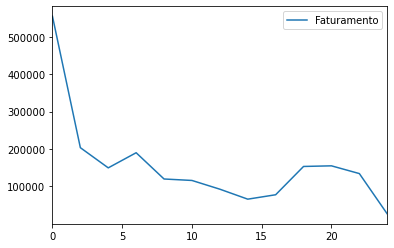

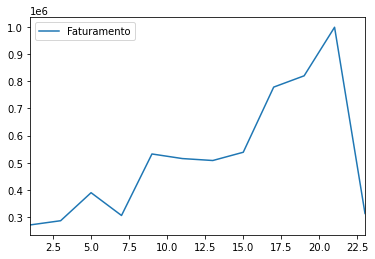

In [33]:
# Plot
faturamento_cliente[faturamento_cliente["TipoUsuario"]=="Novo"].plot()
faturamento_cliente[faturamento_cliente["TipoUsuario"]=="Antigo"].plot()

#### Calculando o sétimo indicador: Taxa de novos clientes

In [34]:
# Calculando a quantidade de novos clientes por mês
qtde_novos_clientes = dados_compras[dados_compras["TipoUsuario"]=="Novo"].groupby("Ano/Mês")["IdCliente"].nunique().reset_index()
qtde_novos_clientes

,Ano/Mês,IdCliente
0,201012,948
1,201101,421
2,201102,380
3,201103,440
4,201104,299
5,201105,279
6,201106,235
7,201107,191
8,201108,167
9,201109,298


In [35]:
# Calculando a quantidade de antigos clientes por mês
qtde_antigos_clientes = dados_compras[dados_compras["TipoUsuario"] == "Antigo"].groupby("Ano/Mês")["IdCliente"].nunique().reset_index()
qtde_antigos_clientes

,Ano/Mês,IdCliente
0,201101,362
1,201102,418
2,201103,580
3,201104,600
4,201105,800
5,201106,816
6,201107,802
7,201108,813
8,201109,1004
9,201110,1073


In [36]:
# Calculando a taxa de novos clientes
tx_novos_clientes = pd.merge(qtde_novos_clientes, qtde_antigos_clientes, on = "Ano/Mês", suffixes = ("_novos", "_antigos"))
tx_novos_clientes

,Ano/Mês,IdCliente_novos,IdCliente_antigos
0,201101,421,362
1,201102,380,418
2,201103,440,580
3,201104,299,600
4,201105,279,800
5,201106,235,816
6,201107,191,802
7,201108,167,813
8,201109,298,1004
9,201110,352,1073


In [37]:
# Incluindo a coluna com a taxa
tx_novos_clientes["Taxa"] = tx_novos_clientes["IdCliente_novos"]/tx_novos_clientes["IdCliente_antigos"]
tx_novos_clientes

,Ano/Mês,IdCliente_novos,IdCliente_antigos,Taxa
0,201101,421,362,1.162983
1,201102,380,418,0.909091
2,201103,440,580,0.758621
3,201104,299,600,0.498333
4,201105,279,800,0.348750
5,201106,235,816,0.287990
6,201107,191,802,0.238155
7,201108,167,813,0.205412
8,201109,298,1004,0.296813
9,201110,352,1073,0.328052


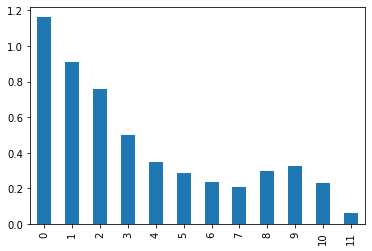

In [38]:
# Plot
tx_novos_clientes["Taxa"].plot(kind = "bar")